In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import utils.plots as p
import seaborn as sn

### Terminal Cost

In [2]:


hours_72 = pd.read_csv("./logs/18.05-10:27-terminal-cost/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
hours_6 = pd.read_csv("./logs/18.05-10:49-terminal-cost-6/signals.csv").drop("Unnamed: 0", axis = 1)
hours_6_with = pd.read_csv("./logs/18.05-10:50-terminal-cost-6-with/signals.csv").drop("Unnamed: 0", axis = 1)

In [3]:
df = pd.DataFrame(data={"date": hours_72.date, "Inf":hours_72.SOC_sim, "Six":hours_6.SOC_sim, "Six-term": hours_6_with.SOC_sim}).set_index("date")
df

,Inf,Six,Six-term
date,,,
2021-04-13 00:10:00,70.0,67.888158,70.000000
2021-04-13 00:20:00,70.0,65.969832,70.000000
2021-04-13 00:30:00,70.0,65.149758,70.000000
2021-04-13 00:40:00,70.0,65.149758,70.000000
2021-04-13 00:50:00,70.0,65.149758,70.000000
...,...,...,...
2021-04-14 23:20:00,79.0,35.327257,58.927776
2021-04-14 23:30:00,79.0,35.327257,58.927775
2021-04-14 23:40:00,79.0,35.327257,58.927775


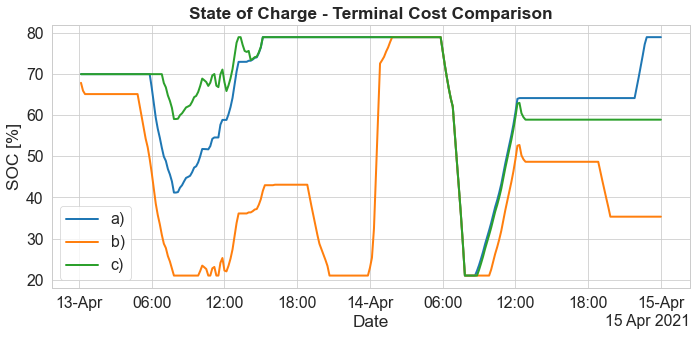

In [4]:
p.plot_from_df(df, ["Inf", "Six", "Six-term"], 
               ylabel = "SOC [%]",
               title = "State of Charge - Terminal Cost Comparison",
               legends = ["a)", "b)", "c)"],
               logpath = "../figs/SOC-term-cost")
#ax = plt.gca()

#ax.legend(["a", "b", "c"], loc = "lower left")
plt.tight_layout()

###  Fixed grid tariff

In [12]:

df1 = pd.read_csv("./logs/18.05-12:23-fixed-perfect/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df2 = pd.read_csv("./logs/18.05-12:28-fixed-perfect/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df3 = pd.read_csv("./logs/18.05-12:31-fixed-scenario-3/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df4 = pd.read_csv("./logs/18.05-12:43-fixed-scenario-7/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df5 = pd.read_csv("./logs/19.05-17:14-fixed-month-9/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1).set_index("date").add_suffix("_S9")
df5["date"] = df5.index
df5 = df5.reset_index(drop=True)
df = pd.merge(df1, df2, left_on="date", right_on="date", suffixes = ("_perf", "_D"))
df = pd.merge(df, df3, left_on="date", right_on="date", suffixes = ("_3", "_S3"))
df = pd.merge(df, df4, left_on="date", right_on="date", suffixes = ("_S3", "_S7"))
df = pd.merge(df, df5, left_on="date", right_on="date", suffixes = ("_S7", "_S9"))
df = df.set_index("date")
df.columns

Index(['SOC_sim_perf', 'SOC_opt_perf', 'Pb_sim_perf', 'Pg_sim_perf',
       'Pb_opt_perf', 'Pg_opt_perf', 'Errors_perf', 'PV_perf', 'Load_perf',
       'Spot_prices_perf', 'P_peak_perf', 'SOC_sim_D', 'SOC_opt_D', 'Pb_sim_D',
       'Pg_sim_D', 'Pb_opt_D', 'Pg_opt_D', 'Errors_D', 'PV_D', 'Load_D',
       'Spot_prices_D', 'P_peak_D', 'SOC_sim_S3', 'SOC_opt_S3', 'Pb_sim_S3',
       'Pg_sim_S3', 'Pb_opt_S3', 'Pg_opt_S3', 'Errors_S3', 'PV_S3', 'Load_S3',
       'Spot_prices_S3', 'P_peak_S3', 'SOC_sim_S7', 'SOC_opt_S7', 'Pb_sim_S7',
       'Pg_sim_S7', 'Pb_opt_S7', 'Pg_opt_S7', 'Errors_S7', 'PV_S7', 'Load_S7',
       'Spot_prices_S7', 'P_peak_S7', 'SOC_sim_S9', 'SOC_opt_S9', 'Pb_sim_S9',
       'Pg_sim_S9', 'Pb_opt_S9', 'Pg_opt_S9', 'Errors_S9', 'PV_S9', 'Load_S9',
       'Spot_prices_S9', 'P_peak_S9'],
      dtype='object')

### Experiment 2.1 - Fixed, perfect predictions

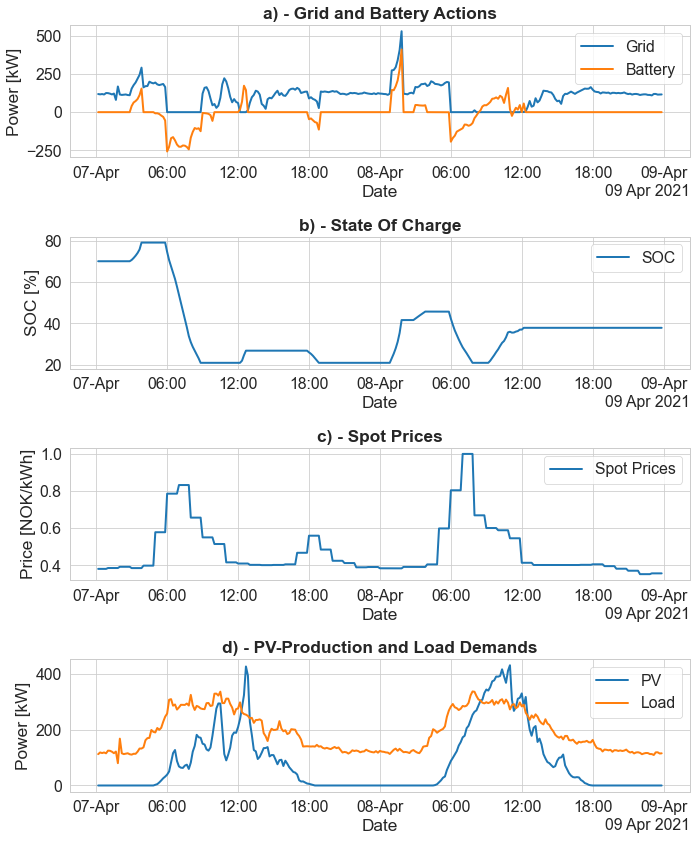

In [13]:
df_short = df[(df.index > datetime(2021, 4, 7, hour=0)) & (df.index < datetime(2021, 4, 9, hour = 0))]

#p.plot_from_df(df_short, ["SOC_sim_perf","SOC_sim_D", "SOC_sim_S7", "SOC_sim_S7"], legends = ["Perf", "DETMPC", "SENMPC-7", "SENMPC-9"])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,12))

p.plot_from_df(df_short, ["Pg_sim_perf", "Pb_sim_perf"], legends = ["Grid", "Battery"], ax = ax1, title = "a) - Grid and Battery Actions")
p.plot_from_df(df_short, ["SOC_sim_perf"], legends = ["SOC"], ax = ax2, title = "b) - State Of Charge", ylabel = "SOC [%]")
p.plot_from_df(df_short, ["Spot_prices_perf"],ylabel = "Price [NOK/kWh]", legends = ["Spot Prices"], ax = ax3, title = "c) - Spot Prices")
p.plot_from_df(df_short, ["PV_perf", "Load_perf"], legends = ["PV", "Load"], ax = ax4,  title = "d) - PV-Production and Load Demands")

plt.tight_layout()
plt.savefig("../figs/fixed-perfect.pdf", format = "pdf")

### Experiment 2.2 - Fixed, uncertainty

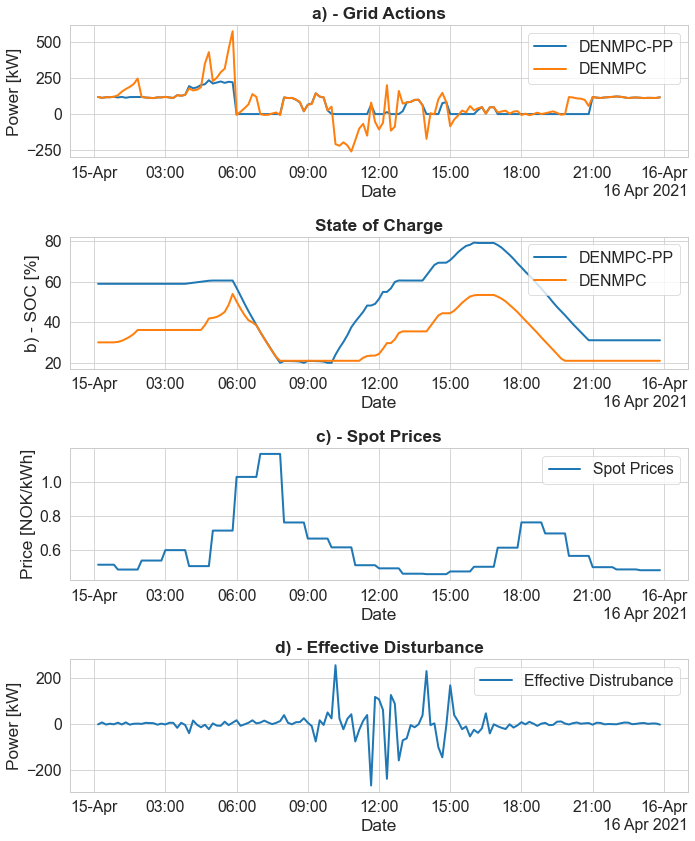

In [7]:
df_short = df[(df.index > datetime(2021, 4, 15, hour=0)) & (df.index < datetime(2021, 4, 16, hour = 0))]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,12))
p.plot_from_df(df_short, ["Pg_opt_perf", "Pg_sim_D"], legends = ["DENMPC-PP", "DENMPC", "SENMPC-7"], title = "a) - Grid Actions", ax = ax1)
p.plot_from_df(df_short, ["SOC_opt_perf", "SOC_sim_D"], legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], ylabel = "b) - SOC [%]",title = "State of Charge", ax = ax2)
p.plot_from_df(df_short, ["Spot_prices_perf"],ylabel = "Price [NOK/kWh]", legends = ["Spot Prices"], title = "c) - Spot Prices", ax = ax3)
p.plot_from_df(df_short, ["Errors_D"], legends = ["Effective Distrubance"], ax = ax4,  title = "d) - Effective Disturbance")
plt.tight_layout()
plt.savefig("../figs/fixed_uncertainties.pdf", format = "pdf")

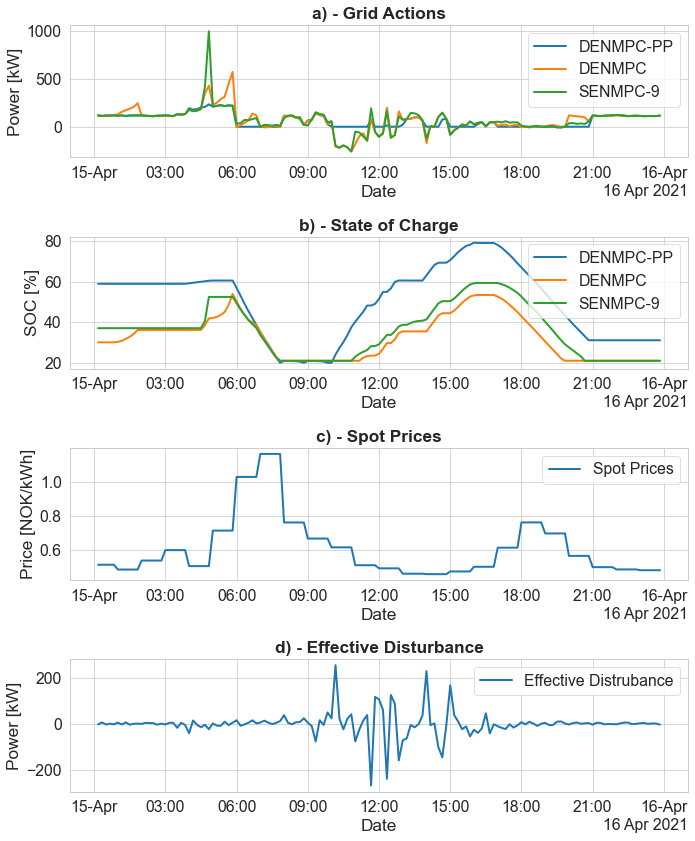

In [8]:
df_short = df[(df.index > datetime(2021, 4, 15, hour=0)) & (df.index < datetime(2021, 4, 16, hour = 0))]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,12))
p.plot_from_df(df_short, ["Pg_opt_perf", "Pg_sim_D", "Pg_sim_S9"], legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], title = "a) - Grid Actions", ax = ax1)
p.plot_from_df(df_short, ["SOC_opt_perf", "SOC_sim_D", "SOC_sim_S9"], legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], ylabel = "SOC [%]",title = "b) - State of Charge", ax = ax2)
p.plot_from_df(df_short, ["Spot_prices_perf"],ylabel = "Price [NOK/kWh]", legends = ["Spot Prices"], title = "c) - Spot Prices", ax = ax3)
p.plot_from_df(df_short, ["Errors_D"], legends = ["Effective Distrubance"], ax = ax4,  title = "d) - Effective Disturbance")
plt.tight_layout()
plt.savefig("../figs/fixed_uncertainties.pdf", format = "pdf")

### Effect Based Tariff

In [14]:
df1 = pd.read_csv("./logs/18.05-14:56-peak-two-days-perf/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df2 = pd.read_csv("./logs/18.05-14:56-peak-two-days-1/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df3 = pd.read_csv("./logs/18.05-14:57-peak-two-days-3/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df4 = pd.read_csv("./logs/18.05-14:57-peak-two-days-7/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df5 = pd.read_csv("./logs/18.05-15:00-peak-two-days-9/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1).set_index("date").add_suffix("_S9")
df5["date"] = df5.index
df5 = df5.reset_index(drop=True)
df = pd.merge(df1, df2, left_on="date", right_on="date", suffixes = ("_perf", "_D"))
df = pd.merge(df, df3, left_on="date", right_on="date", suffixes = ("_3", "_S3"))
df = pd.merge(df, df4, left_on="date", right_on="date", suffixes = ("_S3", "_S7"))
df = pd.merge(df, df5, left_on="date", right_on="date", suffixes = ("_S7", "_S9"))
df = df.set_index("date")
df.columns

Index(['SOC_sim_perf', 'SOC_opt_perf', 'Pb_sim_perf', 'Pg_sim_perf',
       'Pb_opt_perf', 'Pg_opt_perf', 'Errors_perf', 'PV_perf', 'Load_perf',
       'Spot_prices_perf', 'P_peak_perf', 'SOC_sim_D', 'SOC_opt_D', 'Pb_sim_D',
       'Pg_sim_D', 'Pb_opt_D', 'Pg_opt_D', 'Errors_D', 'PV_D', 'Load_D',
       'Spot_prices_D', 'P_peak_D', 'SOC_sim_S3', 'SOC_opt_S3', 'Pb_sim_S3',
       'Pg_sim_S3', 'Pb_opt_S3', 'Pg_opt_S3', 'Errors_S3', 'PV_S3', 'Load_S3',
       'Spot_prices_S3', 'P_peak_S3', 'SOC_sim_S7', 'SOC_opt_S7', 'Pb_sim_S7',
       'Pg_sim_S7', 'Pb_opt_S7', 'Pg_opt_S7', 'Errors_S7', 'PV_S7', 'Load_S7',
       'Spot_prices_S7', 'P_peak_S7', 'SOC_sim_S9', 'SOC_opt_S9', 'Pb_sim_S9',
       'Pg_sim_S9', 'Pb_opt_S9', 'Pg_opt_S9', 'Errors_S9', 'PV_S9', 'Load_S9',
       'Spot_prices_S9', 'P_peak_S9'],
      dtype='object')

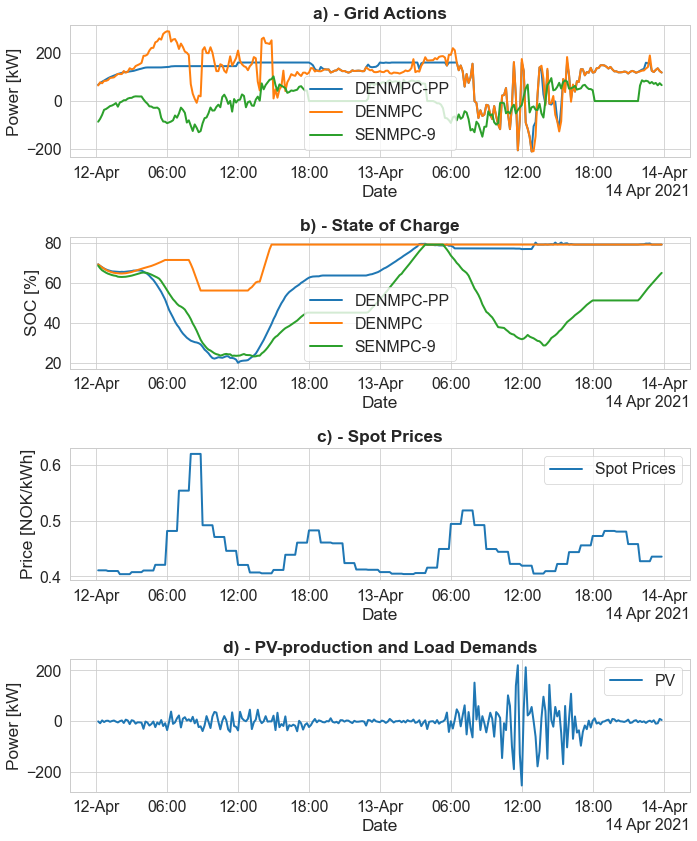

In [10]:
df_short = df[(df.index > datetime(2021, 4, 12, hour=0)) & (df.index < datetime(2021, 4, 14, hour = 0))]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,12))
p.plot_from_df(df_short, ["Pg_opt_perf", "Pg_sim_D", "Pb_sim_S9" ], legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], title = "a) - Grid Actions", ax = ax1)
p.plot_from_df(df_short, ["SOC_opt_perf", "SOC_sim_D", "SOC_sim_S9" ], legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], ylabel = "SOC [%]",title = "b) - State of Charge", ax = ax2)
p.plot_from_df(df_short, ["Spot_prices_perf"],ylabel = "Price [NOK/kWh]", legends = ["Spot Prices"], title = "c) - Spot Prices", ax = ax3)
p.plot_from_df(df_short, ["Errors_S9"], legends = ["PV", "Load"], title = "d) - PV-production and Load Demands", ax = ax4)

plt.tight_layout()

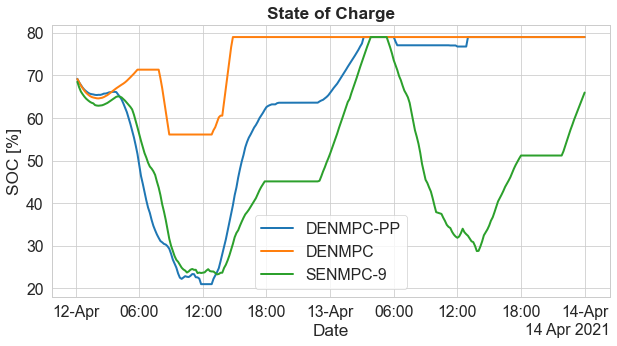

In [15]:
signal = "SOC_sim"
# df = pd.DataFrame(data={"date": df1.date, "1":df1[signal], "2":df2[signal], "3":  df5[signal]}).set_index("date")
p.plot_from_df(df, ["SOC_sim_perf", "SOC_sim_D", "SOC_sim_S9"] , ylabel = "SOC [%]",
               legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], logpath = "../figs/", title = "State of Charge")

In [5]:

df1 = pd.read_csv("./logs/18.05-16:28-peak-month-perf/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df2 = pd.read_csv("./logs/18.05-16:23-peak-month-1/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df3 = pd.read_csv("./logs/18.05-16:11-peak-month-3/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df4 = pd.read_csv("./logs/18.05-15:42-peak-month-7/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
df5 = pd.read_csv("./logs/18.05-15:03-peak-month-9/signals.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1).set_index("date").add_suffix("_S9")
df5["date"] = df5.index
df5 = df5.reset_index(drop=True)
df = pd.merge(df1, df2, left_on="date", right_on="date", suffixes = ("_perf", "_D"))
df = pd.merge(df, df3, left_on="date", right_on="date", suffixes = ("_3", "_S3"))
df = pd.merge(df, df4, left_on="date", right_on="date", suffixes = ("_S3", "_S7"))
df = pd.merge(df, df5, left_on="date", right_on="date", suffixes = ("_S7", "_S9"))
df = df.set_index("date")
df.columns

Index(['SOC_sim_perf', 'SOC_opt_perf', 'Pb_sim_perf', 'Pg_sim_perf',
       'Pb_opt_perf', 'Pg_opt_perf', 'Errors_perf', 'PV_perf', 'Load_perf',
       'Spot_prices_perf', 'P_peak_perf', 'SOC_sim_D', 'SOC_opt_D', 'Pb_sim_D',
       'Pg_sim_D', 'Pb_opt_D', 'Pg_opt_D', 'Errors_D', 'PV_D', 'Load_D',
       'Spot_prices_D', 'P_peak_D', 'SOC_sim_S3', 'SOC_opt_S3', 'Pb_sim_S3',
       'Pg_sim_S3', 'Pb_opt_S3', 'Pg_opt_S3', 'Errors_S3', 'PV_S3', 'Load_S3',
       'Spot_prices_S3', 'P_peak_S3', 'SOC_sim_S7', 'SOC_opt_S7', 'Pb_sim_S7',
       'Pg_sim_S7', 'Pb_opt_S7', 'Pg_opt_S7', 'Errors_S7', 'PV_S7', 'Load_S7',
       'Spot_prices_S7', 'P_peak_S7', 'SOC_sim_S9', 'SOC_opt_S9', 'Pb_sim_S9',
       'Pg_sim_S9', 'Pb_opt_S9', 'Pg_opt_S9', 'Errors_S9', 'PV_S9', 'Load_S9',
       'Spot_prices_S9', 'P_peak_S9'],
      dtype='object')

### Experiment 3.1 - Effect, perfect

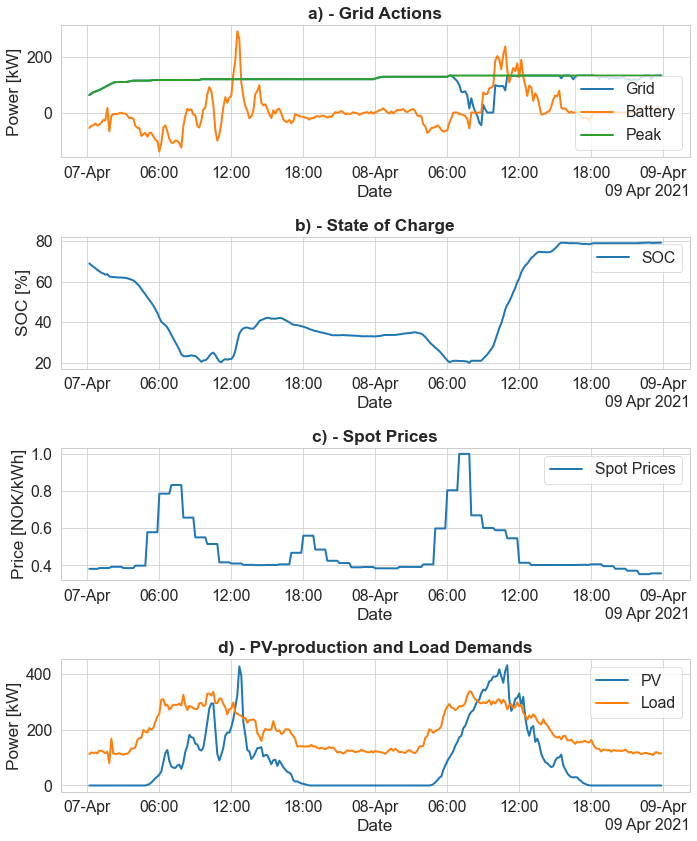

In [6]:
df_short = df[(df.index > datetime(2021, 4, 7, hour=0)) & (df.index < datetime(2021, 4, 9, hour = 0))]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,12))
p.plot_from_df(df_short, ["Pg_opt_perf","Pb_opt_perf", "P_peak_perf", ], legends = ["Grid", "Battery", "Peak"], title = "a) - Grid Actions", ax = ax1)
p.plot_from_df(df_short, ["SOC_opt_perf"], legends = ["SOC", "DENMPC", "SENMPC-9"], ylabel = "SOC [%]",title = "b) - State of Charge", ax = ax2)
p.plot_from_df(df_short, ["Spot_prices_perf"],ylabel = "Price [NOK/kWh]", legends = ["Spot Prices"], title = "c) - Spot Prices", ax = ax3)
p.plot_from_df(df_short, ["PV_perf", "Load_perf"], legends = ["PV", "Load"], title = "d) - PV-production and Load Demands", ax = ax4)

plt.tight_layout()
plt.savefig("../figs/peak-cost-perfect.pdf", format = "pdf")

### Experiment 3.2 - Effect, uncertainty

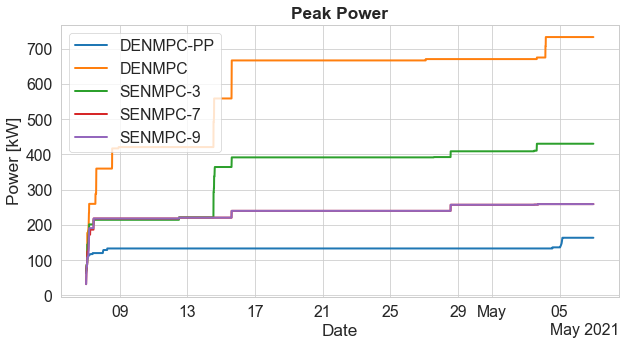

In [7]:
p.plot_from_df(df, ["P_peak_perf", "P_peak_D", "P_peak_S3", "P_peak_S7", "P_peak_S9"], 
               title = "Peak Power", 
               legends = ["DENMPC-PP", "DENMPC", "SENMPC-3", "SENMPC-7", "SENMPC-9"])

plt.savefig("../figs/peak-power-month.pdf", format ="pdf")

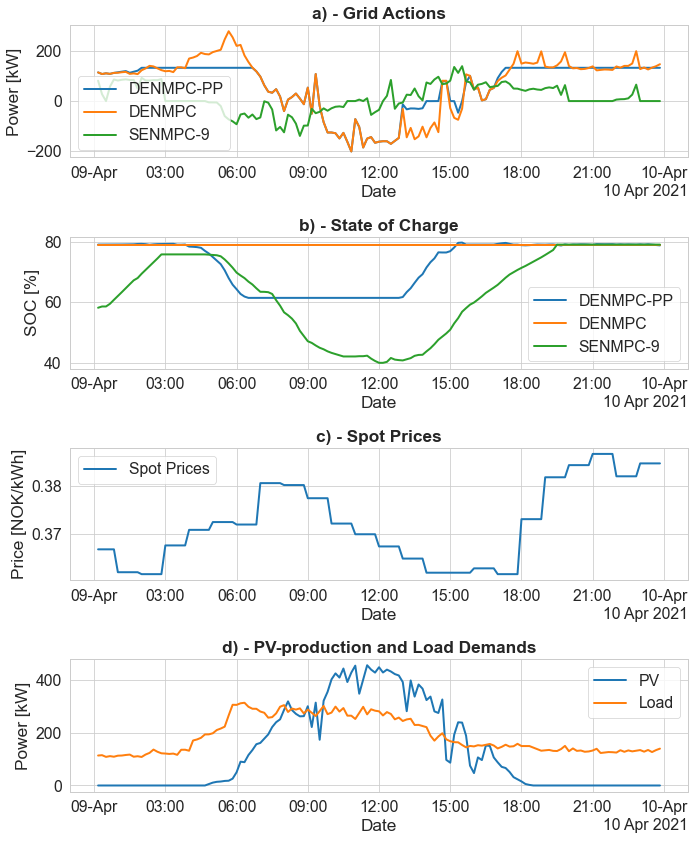

In [117]:
df_short = df[(df.index > datetime(2021, 4, 8, hour=0)) & (df.index < datetime(2021, 4, 10, hour = 0))]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,12))
p.plot_from_df(df_short, ["Pg_opt_perf", "Pg_sim_D", "Pb_sim_S9" ], legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], title = "a) - Grid Actions", ax = ax1)
p.plot_from_df(df_short, ["SOC_opt_perf", "SOC_sim_D", "SOC_sim_S9" ], legends = ["DENMPC-PP", "DENMPC", "SENMPC-9"], ylabel = "SOC [%]",title = "b) - State of Charge", ax = ax2)
p.plot_from_df(df_short, ["Spot_prices_perf"],ylabel = "Price [NOK/kWh]", legends = ["Spot Prices"], title = "c) - Spot Prices", ax = ax3)
p.plot_from_df(df_short, ["PV_perf", "Load_perf"], legends = ["PV", "Load"], title = "d) - PV-production and Load Demands", ax = ax4)

plt.tight_layout()

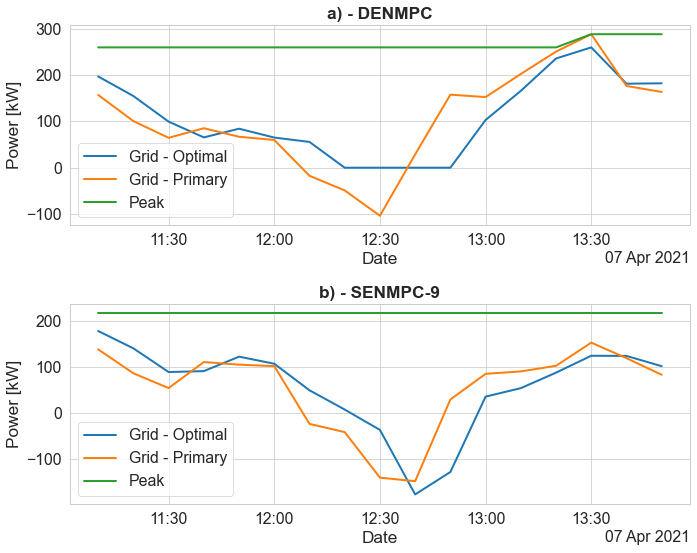

In [8]:
df_short = df[(df.index > datetime(2021, 4, 7, hour=11)) & (df.index < datetime(2021, 4, 7, hour = 14))]
signal = "Pg_sim"

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,8))
p.plot_from_df(df_short, ["Pg_opt_D", "Pg_sim_D", "P_peak_D",], ax = ax1, legends = [], title = "a) - DENMPC")
p.plot_from_df(df_short, [ "Pg_opt_S9", "Pg_sim_S9", "P_peak_S9"], ax = ax2, title = "b) - SENMPC-9")
ax1.legend(["Grid - Optimal", "Grid - Primary", "Peak"])
ax2.legend(["Grid - Optimal", "Grid - Primary", "Peak"])

plt.tight_layout()
plt.savefig("../figs/det_sen_peak.pdf", format = "pdf")

## Discussion

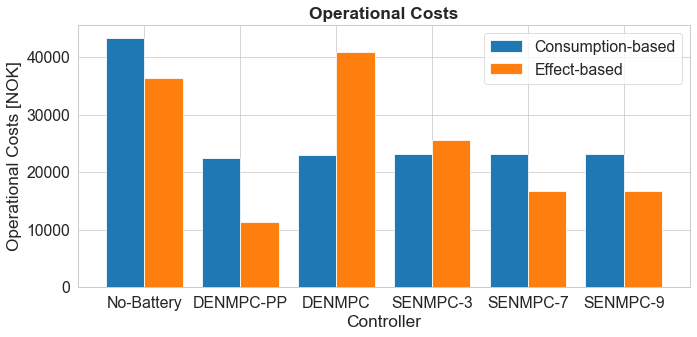

In [34]:
sources = ["No-Battery", "DENMPC-PP", "DENMPC", "SENMPC-3", "SENMPC-7", "SENMPC-9"]
fixed = [43359, 22539, 23003, 23091, 23149, 23224]
effect = [36359, 11275, 40903, 25526, 16701, 16711]
sn.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)
pp = pd.DataFrame(data = {"Fixed":fixed, "Effect":effect, "Source": sources}).set_index("Source")

ind = np.arange(pp.shape[0])
width = 0.4
plt.figure(figsize = (10,5))
plt.bar(ind, pp.Fixed, width=width)
plt.bar(ind+width, pp.Effect, width=width)

plt.xticks(ind + width/2, labels=pp.index)
plt.title("Operational Costs", fontweight="bold")
plt.legend(["Consumption-based", "Effect-based"])
plt.xlabel("Controller")
plt.ylabel("Operational Costs [NOK]")
plt.tight_layout()
plt.show()


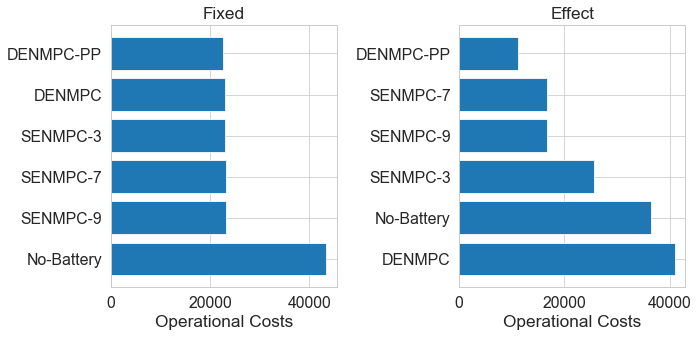

In [47]:
sources_fix = ["DENMPC-PP", "DENMPC", "SENMPC-3", "SENMPC-7", "SENMPC-9", "No-Battery"]
fixed = [22539, 23003, 23091, 23149, 23224, 43359]
sources_effect = ["DENMPC-PP", "SENMPC-7", "SENMPC-9", "SENMPC-3", "No-Battery", "DENMPC"]
effect = [11275,  16701, 16711, 25526, 36359, 40903]

df_fix = pd.DataFrame(data = {"Fixed":fixed, "Source": sources_fix}).set_index("Source")
df_eff = pd.DataFrame(data = {"Effect":effect, "Source": sources_effect}).set_index("Source")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# Example data

ax1.barh(df_fix.index, df_fix.Fixed)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Operational Costs')
ax1.set_title("Fixed")

ax2.barh(df_eff.index, df_eff.Effect)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Operational Costs')
ax2.set_title("Effect")

plt.tight_layout()
plt.show()